# Análise Students Performance in Exames

### Importando as bibliotecas necessárias

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Carregando a base de dados 

In [161]:
df = pd.read_csv('/Users/manu/Downloads/StudentsPerformance.csv')

### Informações iniciais do dataframe

In [133]:
#dVerificando as dimensões 
df.shape

(1000, 8)

O dataframe possui 8 colunas e 1000 linhas. Cada linha representa as informações de um estudante

In [134]:
#Visualização das primeiras linhas
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [135]:
#Nomes das colunas
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [136]:
#Tipos de dados em cada coluna
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Temos duas categorias de variáveis: object e int64

### Limpeza e manipulação do dataset

Para criar uma matriz de correlação, é necessário que todas as variáves representem valores numéricos. Portanto, é necessário fazer o encoding 

In [137]:

df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Criação de uma cópia do dataframe para evitar danificar o original durante a manipulação dos dados

In [138]:
df1 = df

In [139]:
#Cria-se um dicionário para associar cada valor categórico a um valor numérico 
encoding = {"bachelor's degree" : 5, 'some college' : 3, "master's degree" : 6, 
            "associate's degree" : 4, 'high school' : 2, 'some high school' : 1}

df1['parental level of education'] = df1['parental level of education'].map(encoding)
#A função map() aplica a codificação criada a todos os elementos da coluna

Cada categoria de nível educacional foi ordenada com números de 1 a 6, e só então os valores foram substituídos nas colunas 

In [140]:
df1.dtypes
#Observe que a coluna "parental level of education" agora é da categoria int64

gender                         object
race/ethnicity                 object
parental level of education     int64
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Agora é necessário converter todas as colunas para valores numéricos

In [174]:
# Inicializando o LabelEncoder
encoder = LabelEncoder()

# Ajuste o encoder aos dados e transforme a coluna
df1['gender'] = encoder.fit_transform(df1['gender'])  
# Os generos masculino e feminino foram codificados com valores binários 

# Adicionando 1 para começar a partir de 1
df1['race/ethnicity'] = encoder.fit_transform(df1['race/ethnicity']) + 1  


df1['lunch'] = encoder.fit_transform(df1['lunch'])
# Coluna lunch codificada com valores binários 

df1['test preparation course'] = encoder.fit_transform(df1['test preparation course'])
#Coluna para conclusão de curso preparatório codificada com valores binários  

In [175]:
display(df1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,media,total score
0,0,2,5,1,1,72,72,74,72.67,218
1,0,3,3,1,0,69,90,88,82.33,247
2,0,2,6,1,1,90,95,93,92.67,278
3,1,1,4,0,1,47,57,44,49.33,148
4,1,3,3,1,1,76,78,75,76.33,229
...,...,...,...,...,...,...,...,...,...,...
995,0,5,6,1,0,88,99,95,94.00,282
996,1,3,2,0,1,62,55,55,57.33,172
997,0,3,2,0,0,59,71,65,65.00,195
998,0,4,3,1,0,68,78,77,74.33,223


In [176]:
# Calcular a matriz de correlação
matriz_correlacao = df1.corr()

print("Matriz de Correlação:")
print(matriz_correlacao)

Matriz de Correlação:
                               gender  race/ethnicity  \
gender                       1.000000       -0.001502   
race/ethnicity              -0.001502        1.000000   
parental level of education -0.043934        0.095906   
lunch                        0.021372        0.046563   
test preparation course     -0.006028       -0.017508   
math score                   0.167982        0.216415   
reading score               -0.244313        0.145253   
writing score               -0.301225        0.165691   
media                       -0.130868        0.185165   
total score                 -0.130861        0.185168   

                             parental level of education     lunch  \
gender                                         -0.043934  0.021372   
race/ethnicity                                  0.095906  0.046563   
parental level of education                     1.000000 -0.023259   
lunch                                          -0.023259  1.000000   


Para imprimir a matriz de correlação de uma forma mais amigável ao usuário, vamos apresentá-la como um mapa de calor. 

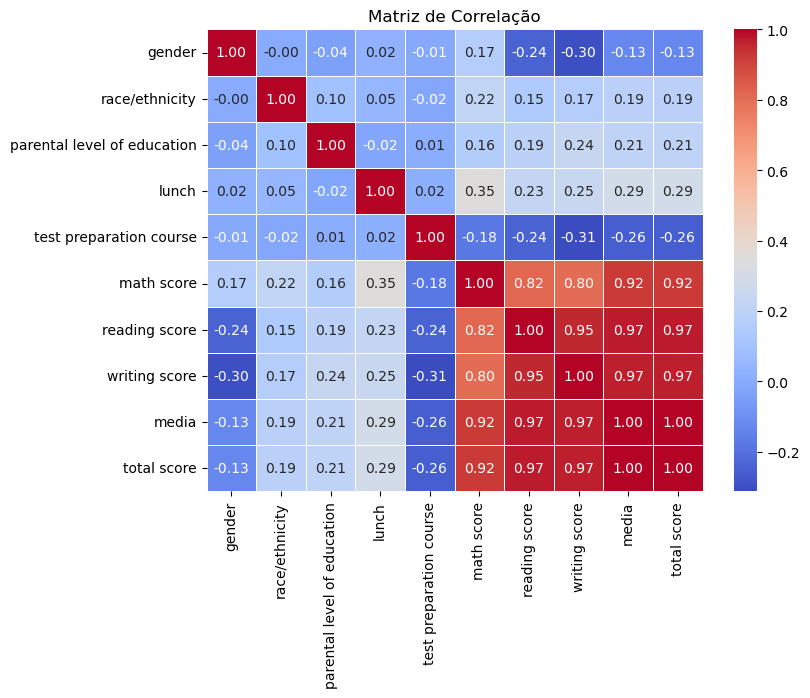

In [177]:
# Configurando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

### Extração de estatísticas básicas

In [178]:
#Criação de uma nova coluna para cálculo da média das notas
df1["media"] = round((df["math score"] + df["reading score"] 
                      + df["writing score"])/3, 2)

df["media"] = df1["media"]

In [179]:
df1.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,media,total score
0,0,2,5,1,1,72,72,74,72.67,218
1,0,3,3,1,0,69,90,88,82.33,247
2,0,2,6,1,1,90,95,93,92.67,278
3,1,1,4,0,1,47,57,44,49.33,148
4,1,3,3,1,1,76,78,75,76.33,229
5,0,2,4,1,1,71,83,78,77.33,232
6,0,2,3,1,0,88,95,92,91.67,275
7,1,2,3,0,1,40,43,39,40.67,122
8,1,4,2,0,0,64,64,67,65.00,195
9,0,2,2,0,1,38,60,50,49.33,148


Definição das médias máxima e mínima dentre os estudantes

In [147]:
df1["media"].max()

100.0

In [148]:
df1["media"].min()

9.0

In [149]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,media
0,0,2,5,2,2,72,72,74,72.67
1,0,3,3,2,1,69,90,88,82.33
2,0,2,6,2,2,90,95,93,92.67
3,1,1,4,1,2,47,57,44,49.33
4,1,3,3,2,2,76,78,75,76.33


### Análise do perfil dos entrevistados

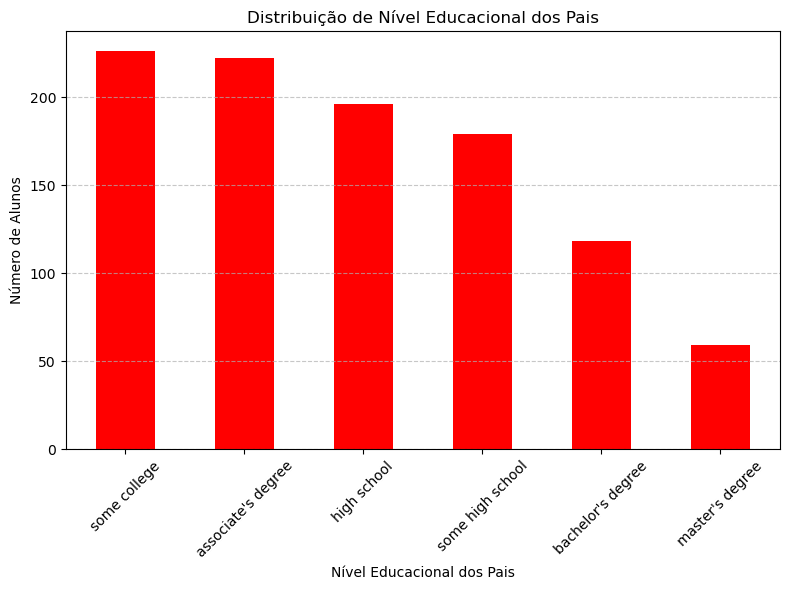

In [180]:
education_counts = df['parental level of education'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', color='r')
plt.title('Distribuição de Nível Educacional dos Pais')
plt.xlabel('Nível Educacional dos Pais')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta automaticamente a disposição dos elementos do gráfico para evitar sobreposição
plt.show()

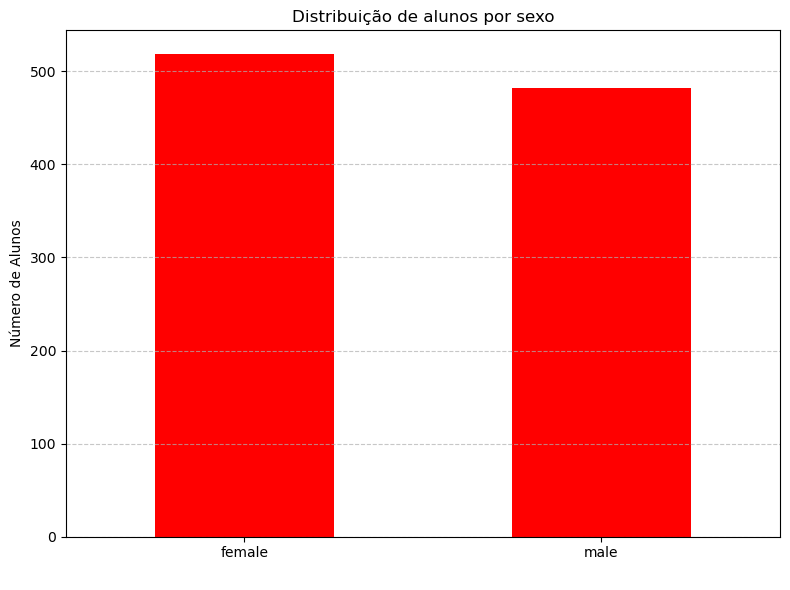

In [182]:
gender_count = df['gender'].value_counts()
# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
gender_count.plot(kind='bar', color='r')
plt.title('Distribuição de alunos por sexo')
plt.xlabel(' ')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta automaticamente a disposição dos elementos do gráfico para evitar sobreposição
plt.show()

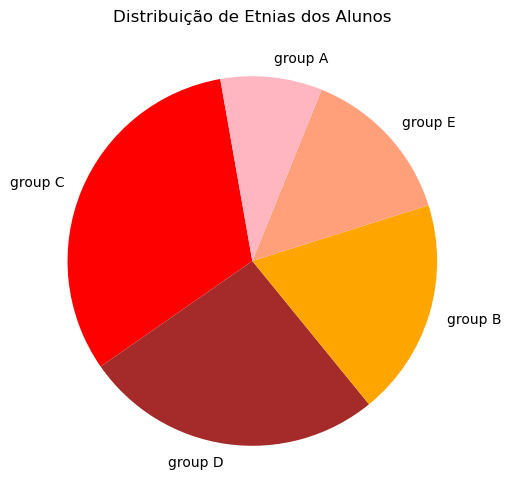

In [186]:
ethnicity_counts = df["race/ethnicity"].value_counts()
# Criar um gráfico de pizza
plt.figure(figsize=(8, 6))
ethnicity_counts.plot(kind='pie', colors=['r', 'brown', 'orange', 'lightsalmon', 'lightpink'], startangle=100)
plt.title('Distribuição de Etnias dos Alunos')
plt.ylabel('')
plt.show()

### Extração de insights

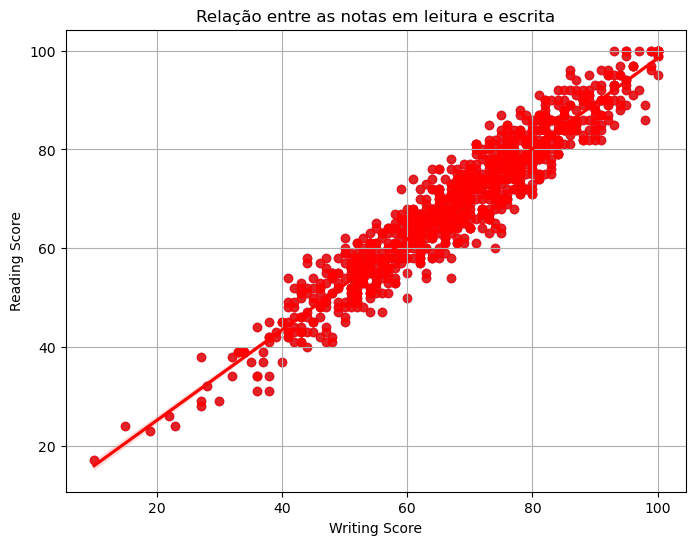

In [150]:
# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['writing score'], df['reading score'], alpha=0.6)
sns.regplot(x='writing score', y='reading score', data=df, color='r')
plt.title('Relação entre as notas em leitura e escrita')
plt.xlabel('Writing Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

É possível notar que há uma relação de proporcionalidade direta entre as váriaveis "Reading score"e "Writing score"

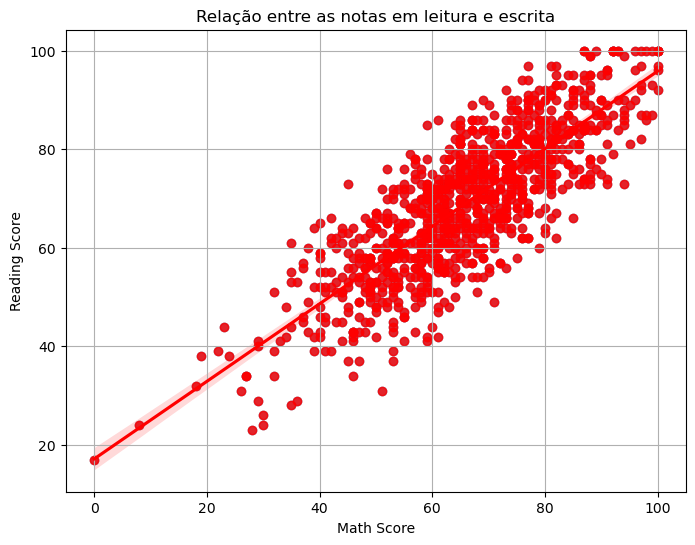

In [151]:
# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['math score'], df['reading score'], alpha=0.6)
sns.regplot(x='math score', y='reading score', data=df, color='r')
plt.title('Relação entre as notas em leitura e escrita')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.grid(True)
plt.show()

É possível observar que há uma relação direta entre as notas em leitura, escrita e matemática. O que leva à conclusão de que os alunos com boas pontuações dominam simultaneamente várias áreas do conhecimento


In [157]:
df["test preparation course"]. unique()

array([2, 1])

*Pergunta: 
"O quão proveitoso foi o curso preparatório?"

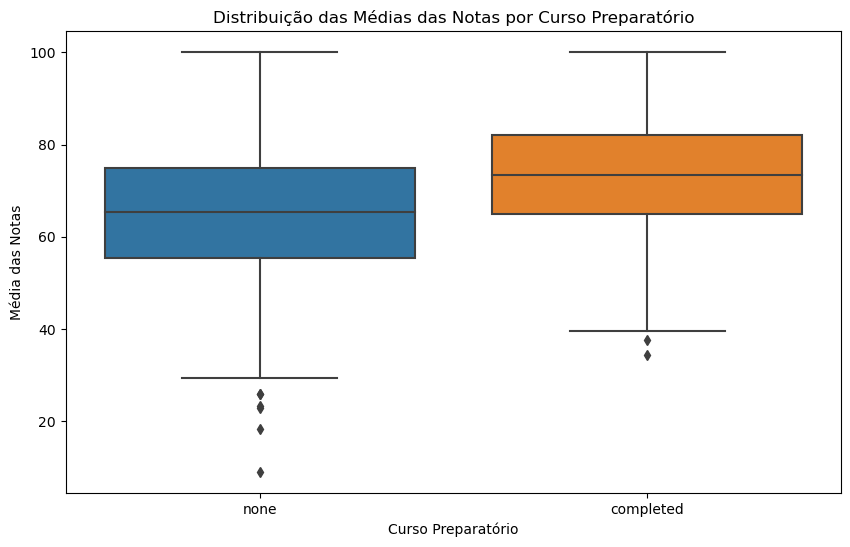

In [165]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='media', data=df)
plt.title('Distribuição das Médias das Notas por Curso Preparatório')
plt.xlabel('Curso Preparatório')
plt.ylabel('Média das Notas')
plt.show()

É possível inferir que os alunos que completaram cursos preparatórios obtiveram desempenho levemente maior do que os que não participaram destes cursos

